In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# shape of the dataset
df.shape

(891, 12)

In [4]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId has no relation with the target as the minimum value is 1 and max is 891 which is the total nos of rows.

Mean of survived indicates the percentage of passengers who survived, which is 38.38%.

Age got data ranging from 0.4 to 80 years.

Fare has outliers observing the mean, deviation, max and the 75%.

age has missing values as the count is 714.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin got 687/891 missing values which will be tough to treat.

Age and embarked got 177 and 2 empty values respectively

In [7]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
fem=df[df["Sex"]=="female"]
mal=df[df["Sex"]=="male"]

Text(0.5, 1.0, 'Male')

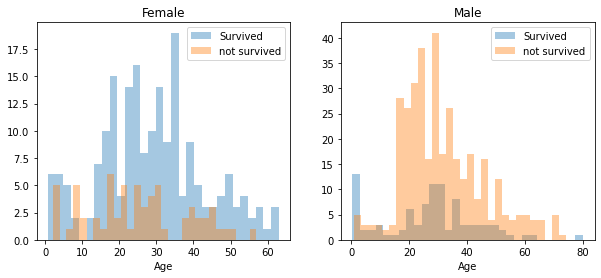

In [10]:
plt.figure(figsize=(10,4))

ax=plt.subplot(1,2,1)
sns.distplot(fem[fem["Survived"]==1].Age.dropna(), bins=30, label= "Survived",kde= False).legend()
sns.distplot(fem[fem["Survived"]==0].Age.dropna(), bins=30, label= "not survived", kde=False).legend()
plt.title("Female")

ax=plt.subplot(1,2,2)
sns.distplot(mal[mal["Survived"]==1].Age.dropna(), bins=30, label= "Survived", kde=False).legend()
sns.distplot(mal[mal["Survived"]==0].Age.dropna(), bins=30, label= "not survived", kde=False).legend()
plt.title("Male")

Females between the age 12-45 has higher survival rate with some irregularities in between.

Males between the age 17-38 has more survival rate but with few irregularities inbetween.

Infants got more survival rate.

If we compare both the subplots, we get to know that more number of females survived as compared to males.



Text(0.5, 1.0, 'Male')

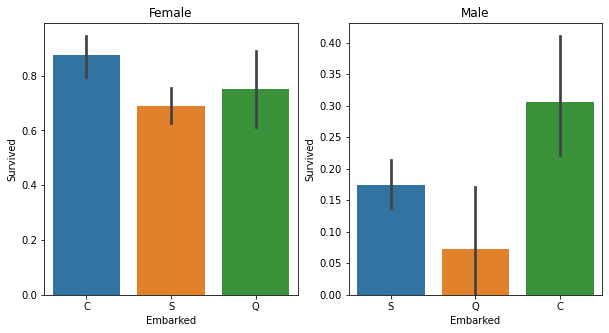

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot("Embarked", "Survived", data=fem)
plt.title("Female")

plt.subplot(1,2,2)
sns.barplot("Embarked", "Survived", data=mal)
plt.title("Male")

more no of female embarked at Ports C and Q survived as compared to port S.

those Males embarked at port C survived more in nos.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

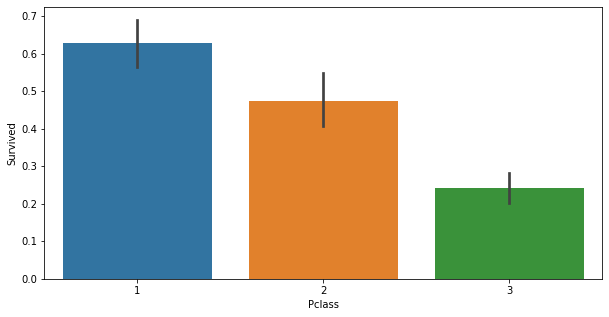

In [12]:
plt.figure(figsize=(10,5))
sns.barplot("Pclass", "Survived", data=df)

Passenger class also contibutes to the survival of passengers. Pclass1 has more survival rate followed by pclass 2 and then 3.

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Replace null vlaues of Cabin with 0. As encoding might replace null with some other value

In [14]:
index=df[df["Cabin"].isnull()].index    #stores index of null values of Cabin

c= df["Cabin"].dropna()

In [15]:
#Replace null with 0
cab= df['Cabin'].astype(str)    # converts in string

for i in range(len(df["Cabin"])):
    df["Cabin"][i]= cab[i][0]    #keeps only first letter of values
    
for i in index:
    df["Cabin"][i]=0
    
#other values will be handles while encoding

#### Handling Null data in Age

In [16]:
df["Age"].isnull().sum()

177

In [17]:
mean= df["Age"].mean()
std= df["Age"].std()
for i in range (len(df["Age"])):
    no= np.random.randint(mean-std, mean+std)
    
    if (np.isnan(df["Age"][i]))==True:
        df["Age"][i]= no

In [18]:
df["Age"].isnull().sum()

0

#### Handling null values in Embarked

In [19]:
df["Embarked"].isnull().sum()

2

In [20]:
# Embarked has only 2 null values. fillinf thme with most frequent value i.e. mode
df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"].isnull().sum()

0

#### SibSp and Parch

In [21]:
#Sibsp and parch can be combined together as they all are same family

df["Family"]= df["SibSp"]+df["Parch"]

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [23]:
#we can now drop SibSp and Parch columns along with other unnecessary columns
df=df.drop(["PassengerId", "Ticket", "SibSp", "Parch"], axis=1)    

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0


#### Handling names

In [25]:
'''name column got details like mr., mrs., miss., etc. which can be important factor to train or model as we already 
know that Survival depends on sex and age. let's filter that out''' 
n=[]
for i in df["Name"]:
    n.append(i.split(", ")[1].split(".")[0])

n=pd.DataFrame({"Title":n})

In [26]:
n["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [27]:
# here we can see few VIPs' titles. let's combine them into 1.
n["Title"]= n["Title"].replace(['Don', 'Rev', 'Dr', 'Major', 'Sir','Col', 'Capt', 'the Countess', 'Jonkheer', 'Lady'], "VIP")

n["Title"]= n["Title"].replace("Mme","Mrs")
n["Title"]= n["Title"].replace(["Mlle","Ms"],"Miss")

n["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'VIP'], dtype=object)

In [28]:
df["Title"]=n["Title"]
df=df.drop("Name", axis=1)

In [29]:
df.corr()

,Survived,Pclass,Age,Fare,Family
Survived,1.000000,-0.338481,-0.061087,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.324363,-0.549500,0.065997
Age,-0.061087,-0.324363,1.000000,0.096126,-0.219241
Fare,0.257307,-0.549500,0.096126,1.000000,0.217138
Family,0.016639,0.065997,-0.219241,0.217138,1.000000


<AxesSubplot:>

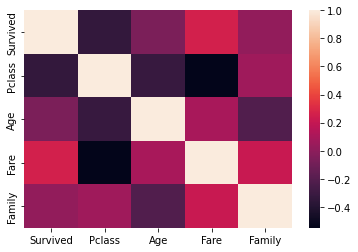

In [30]:
sns.heatmap(df.corr())

#### Encoding

In [31]:
df.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Title'], dtype=object)

In [32]:
# encode the categorical columns
from sklearn.preprocessing import LabelEncoder

In [34]:
df['Cabin']= df['Cabin'].astype(str)

In [35]:
le= LabelEncoder()

enc1= le.fit_transform(df["Sex"])
enc2= le.fit_transform(df["Embarked"])
enc3= le.fit_transform(df["Title"])
enc4= le.fit_transform(df["Cabin"])

df["Sex"]=enc1
df["Embarked"]= enc2
df["Title"]= enc3
df["Cabin"]= enc4

In [36]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Title
0,0,3,1,22.0,7.2500,0,2,1,2
1,1,1,0,38.0,71.2833,3,0,1,3
2,1,3,0,26.0,7.9250,0,2,0,1
3,1,1,0,35.0,53.1000,3,2,1,3
4,0,3,1,35.0,8.0500,0,2,0,2


In [37]:
df.corr()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Title
Survived,1.000000,-0.338481,-0.543351,-0.061087,0.257307,0.287944,-0.167675,0.016639,-0.071174
Pclass,-0.338481,1.000000,0.131900,-0.324363,-0.549500,-0.570691,0.162098,0.065997,-0.181177
Sex,-0.543351,0.131900,1.000000,0.070668,-0.182333,-0.143517,0.108262,-0.200988,0.060299
Age,-0.061087,-0.324363,0.070668,1.000000,0.096126,0.169280,-0.007012,-0.219241,0.465003
Fare,0.257307,-0.549500,-0.182333,0.096126,1.000000,0.337525,-0.224719,0.217138,-0.013273
Cabin,0.287944,-0.570691,-0.143517,0.169280,0.337525,1.000000,-0.080523,-0.003057,0.039618
Embarked,-0.167675,0.162098,0.108262,-0.007012,-0.224719,-0.080523,1.000000,0.066516,0.005207
Family,0.016639,0.065997,-0.200988,-0.219241,0.217138,-0.003057,0.066516,1.000000,-0.202145
Title,-0.071174,-0.181177,0.060299,0.465003,-0.013273,0.039618,0.005207,-0.202145,1.000000


<AxesSubplot:>

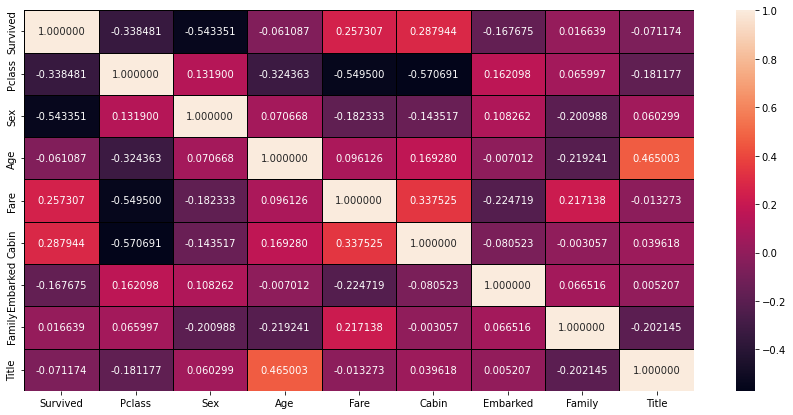

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt='f')

Text(0.5, 0, 'Family')

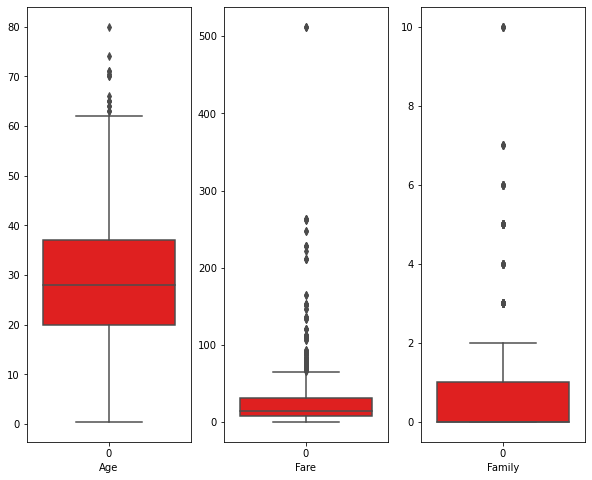

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
sns.boxplot(data=df["Age"],color="red", orient="v")
plt.xlabel("Age")

plt.subplot(1,3,2)
sns.boxplot(data=df["Fare"],color="red", orient="v")
plt.xlabel("Fare")

plt.subplot(1,3,3)
sns.boxplot(data=df["Family"],color="red", orient="v")
plt.xlabel("Family")

Age- Age column has few outliers which indicates persons aged above 63 years upto 80, but it may be possible for a person to live 80 years or more.

similary in the other 2 columns we can't say that they are really outliers.

In [271]:
for i in df[df["Family"]== 10].index :
    print(df.loc[i],"\n")

Survived     0.000000
Pclass       3.000000
Sex          1.000000
Age         37.000000
Fare         6.322727
Cabin        0.000000
Embarked     2.000000
Family      10.000000
Title        0.000000
Name: 159, dtype: float64 

Survived     0.000000
Pclass       3.000000
Sex          0.000000
Age         22.000000
Fare         6.322727
Cabin        0.000000
Embarked     2.000000
Family      10.000000
Title        1.000000
Name: 180, dtype: float64 

Survived     0.000000
Pclass       3.000000
Sex          1.000000
Age         42.000000
Fare         6.322727
Cabin        0.000000
Embarked     2.000000
Family      10.000000
Title        2.000000
Name: 201, dtype: float64 

Survived     0.000000
Pclass       3.000000
Sex          1.000000
Age         27.000000
Fare         6.322727
Cabin        0.000000
Embarked     2.000000
Family      10.000000
Title        2.000000
Name: 324, dtype: float64 

Survived     0.000000
Pclass       3.000000
Sex          0.000000
Age         41.000000
Fare    

In [272]:
for i in df[df["Family"]== 1].index :
    print(df.loc[i],"\n")
    break

Survived     0.000
Pclass       3.000
Sex          1.000
Age         22.000
Fare         3.625
Cabin        0.000
Embarked     2.000
Family       1.000
Title        2.000
Name: 0, dtype: float64 



From above 2 lines we can see that for the same Pclass and Embarked, Fares are huge for those with 10 no of family members when compared to those who are travelling alone. Hence, we can conclude that Fares are sum of all Family members. we need to treat them

In [42]:
df["Fare"]= df["Fare"]/(df["Family"]+1)

Final dataset for training our model is as below:

In [43]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Title
0,0,3,1,22.0,3.62500,0,2,1,2
1,1,1,0,38.0,35.64165,3,0,1,3
2,1,3,0,26.0,7.92500,0,2,0,1
3,1,1,0,35.0,26.55000,3,2,1,3
4,0,3,1,35.0,8.05000,0,2,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.00000,0,2,0,4
887,1,1,0,19.0,30.00000,2,2,0,1
888,0,3,0,25.0,5.86250,0,2,3,1
889,1,1,1,26.0,30.00000,3,0,0,2


In [44]:
# seperate features and label

x= df.drop(["Survived"],axis=1)
y=df["Survived"]

In [46]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [55]:
#Oversampling
from imblearn.over_sampling import SMOTE
sm= SMOTE(0.9)

X,Y= sm.fit_resample(x,y)

In [56]:
len(X), len(Y)

(1043, 1043)

In [57]:
Y.value_counts()

0    549
1    494
Name: Survived, dtype: int64

###  Model

In [258]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [188]:
#finding best randomstates
method=[LogisticRegression(), DecisionTreeClassifier(), SVC()]

for m in method:
    print("\nStarting with", m)
    acc= 0
    rs=0
    lr= m
    for i in range (200):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
        lr.fit(x_train, y_train)
        y_pred= lr.predict(x_test)
        accuracy= accuracy_score(y_test, y_pred)
        #print("{0} at random state {1}".format(accuracy, i))
    
        if accuracy>acc:
            acc=accuracy
            rs=i
            print("Best Accuracy now is {0} at random state {1}".format(acc,rs))
            
print("best random states found")


Starting with LogisticRegression()
Best Accuracy now is 0.8516746411483254 at random state 0
Best Accuracy now is 0.861244019138756 at random state 34
Best Accuracy now is 0.8708133971291866 at random state 50
Best Accuracy now is 0.8755980861244019 at random state 137

Starting with DecisionTreeClassifier()
Best Accuracy now is 0.7990430622009569 at random state 0
Best Accuracy now is 0.8086124401913876 at random state 1
Best Accuracy now is 0.8277511961722488 at random state 2
Best Accuracy now is 0.8421052631578947 at random state 4
Best Accuracy now is 0.8516746411483254 at random state 33

Starting with SVC()
Best Accuracy now is 0.631578947368421 at random state 0
Best Accuracy now is 0.6746411483253588 at random state 1
Best Accuracy now is 0.7081339712918661 at random state 5
Best Accuracy now is 0.7177033492822966 at random state 10
Best Accuracy now is 0.722488038277512 at random state 14
Best Accuracy now is 0.7272727272727273 at random state 17
Best Accuracy now is 0.73205

In [189]:
acc=0
rs=0
rf= RandomForestClassifier(n_estimators=200)
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    rf.fit(x_train, y_train)
    y_pred= rf.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
    
    if accuracy>acc:
        acc=accuracy
        rs=i
        print("Best Accuracy now is {0} at random state {1}".format(acc,rs))

Best Accuracy now is 0.8851674641148325 at random state 0
Best Accuracy now is 0.8995215311004785 at random state 50


In [190]:
acc=0
rs=0
kn= KNeighborsClassifier(n_neighbors=3)
    
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    kn.fit(x_train, y_train)
    y_pred= kn.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
        
    if accuracy>acc:
        acc=accuracy
        rs=i
        print("Best Accuracy now is {0} at random state {1}".format(acc,rs))

Best Accuracy now is 0.7799043062200957 at random state 0
Best Accuracy now is 0.784688995215311 at random state 1
Best Accuracy now is 0.8133971291866029 at random state 6
Best Accuracy now is 0.8277511961722488 at random state 45


#### Logistic regression

In [191]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=137)
lr=LogisticRegression()

lr.fit(x_train, y_train)

y_pred= lr.predict(x_test)

accuracy_lr= accuracy_score(y_test, y_pred)*100
accuracy_lr

87.5598086124402

### Decision Tree

In [192]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=33)
dt= DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred= dt.predict(x_test)

accuracy_dt= accuracy_score(y_test, y_pred)*100
accuracy_dt

85.16746411483254

### SVM

In [193]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=132)
svc= SVC()

svc.fit(x_train, y_train)

y_pred= svc.predict(x_test)

accuracy_svc= accuracy_score(y_test, y_pred)*100
accuracy_svc

76.55502392344498

### RandomForestClassifier

In [242]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)
rf= RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
accuracy_rf= accuracy_score(y_test, y_pred)*100

accuracy_rf

89.47368421052632

### KNeighborsClassifier

In [196]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
kn= KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)
y_pred= kn.predict(x_test)
accuracy_kn= accuracy_score(y_test, y_pred)*100

accuracy_kn

82.77511961722487

In [197]:
print("Accuracy of LinearRegression is", accuracy_lr)
print("Accuracy of DecisionTree is", accuracy_dt)
print("Accuracy of SVM is", accuracy_svc)
print("Accuracy of RandomForestClassifier is", accuracy_rf)
print("Accuracy of KNeighborsClassifier is", accuracy_kn)

Accuracy of LinearRegression is 87.5598086124402
Accuracy of DecisionTree is 85.16746411483254
Accuracy of SVM is 76.55502392344498
Accuracy of RandomForestClassifier is 89.95215311004785
Accuracy of KNeighborsClassifier is 82.77511961722487


Here, we can see that RandomForest is more accurate. let's confirm this.

### Cross validation

In [249]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=194)

In [250]:
cvs= cross_val_score(rf, x_train, y_train, cv=5)

In [251]:
print('accuracies:',cvs)
print('mean:', cvs.mean()*100)
print('Std dev. :', cvs.std()*100)

accuracies: [0.83832335 0.89820359 0.79640719 0.79041916 0.80120482]
mean: 82.49116225380563
Std dev. : 4.028854112395888


Our model has an average accuracy of 82.5% and Deviation of 3.36%

### Hyperparameter Tuning

#### GridSearchCV

In [217]:
grid_param = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(0,6),
    "min_samples_leaf":range(2,11),
    "min_samples_split":range(3,11),
    "max_leaf_nodes": range(2,11)
}

gs= GridSearchCV(estimator=rf, param_grid=grid_param, cv=5, n_jobs=-1)

In [218]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 6),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_leaf': range(2, 11),
                         'min_samples_split': range(3, 11)})

In [219]:
best= gs.best_params_
best

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 9}

In [221]:
rfgs= RandomForestClassifier(criterion= 'gini', max_depth=5, max_leaf_nodes=10, min_samples_leaf=8, 
                             min_samples_split=9)

rfgs.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=8,
                       min_samples_split=9)

In [222]:
y_pred=rfgs.predict(x_test)

In [225]:
accuracy_rfgs=accuracy_score(y_test, y_pred)
accuracy_rfgs*100

87.5598086124402

In [234]:
rs= RandomizedSearchCV(estimator=rf, param_distributions=grid_param, cv=5, n_jobs=-1)

In [235]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 6),
                                        'max_leaf_nodes': range(2, 11),
                                        'min_samples_leaf': range(2, 11),
                                        'min_samples_split': range(3, 11)})

In [236]:
best= rs.best_params_
best

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 7,
 'max_depth': 4,
 'criterion': 'gini'}

In [238]:
rfrs=RandomForestClassifier(criterion= 'gini', max_depth=4, max_leaf_nodes=7, min_samples_leaf=2, 
                             min_samples_split=8)

rfrs.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=8)

In [240]:
y_pred= rfrs.predict(x_test)

accuracy_rfrs = accuracy_score(y_test, y_pred)
accuracy_rfrs

0.8660287081339713

we can see that the default parameters were giving better accuracy.

In [252]:
#default random forest
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)
rf= RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
accuracy_rf= accuracy_score(y_test, y_pred)*100

accuracy_rf

89.95215311004785

In [254]:
confusion_matrix(y_test,y_pred)

array([[99,  8],
       [13, 89]], dtype=int64)

In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.92      0.87      0.89       102

    accuracy                           0.90       209
   macro avg       0.90      0.90      0.90       209
weighted avg       0.90      0.90      0.90       209



### AUC-ROC curve

In [259]:
fpr, tpr, threshold= roc_curve(y_test,y_pred)

print("Threshold: ", threshold)
print("FPR: ", fpr)
print("TPR: ", tpr)

Threshold:  [2 1 0]
FPR:  [0.         0.07476636 1.        ]
TPR:  [0.         0.87254902 1.        ]


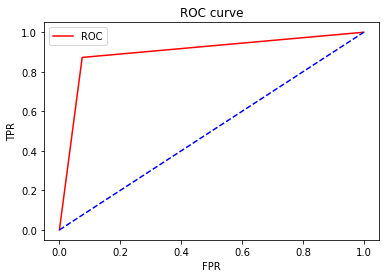

In [260]:
plt.plot(fpr,tpr,color='red', label= 'ROC')
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve')
plt.legend()

In [262]:
#AUC
auc= roc_auc_score(y_test, y_pred)
auc

0.8988913322338281

### Saving model

In [263]:
import pickle

In [265]:
#saving model
Titanic_model= pickle.dumps(rf)

In [266]:
#Loading model
pck_file= pickle.loads(Titanic_model)

In [267]:
pck_file.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)